# ML2B1 - (MAJOR PROJECT (Car Cost Prediction))

The project consists of four parts :-

1. Data Cleaning  
2. EDA - to analyse the data
3. Model construction for prediction and Performance Assesment 
4. Prediction on Test Data

In [1]:
# Importing all the libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#import warnings 
#warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# creating the object of the classes
enc=LabelEncoder()
regressor=RandomForestRegressor()

In [3]:
# importing all the data
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Data_Test.xlsx")

# Having a glance


In [4]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


## DATA CLEANING.

By observing the above data set we see that we have to carry out the following data cleaning processes :

1. Since we can only feed numeric values to the model all the object type variables will be converted to int or
   float wherever possible .
   
2. Label encoding will be applied to the following data colmns :
                                                               a. Transmission
                                                               b. Fuel_Type
                                                               c. Owner_Type
                                                               d. Name
                                                               e. Location
                                                               
3. Engine,Power,Milage should not be encoded through LabelEncoder, because we need to fit the model in regressor   
   mode,if we use the encoding fromat,it will obviously fit the model in wrong way,which will obviously predict the    wrong values.
   

   
   


### Removing the NULL Values from the datasets 

Cleansing the data set of NULL Values includes :-

1. Replacing the NULL in int or float type columns by the mean of the column data.

2. Converting the NaN string value by null string.
                                               

## Cleaning the train_data

In [6]:
# This cell cleans the train_data dataset

d=train_data.dtypes # catches the data type train_data
print("Before data cleansing\n\n\n\n")
print(train_data.info()) # gets the count of non-Null values in each and every columns of dataframw 



s=train_data.shape #s holds the dimension of the dataframe,where s[0]->number of rows,s[1]->number of columns

for i in range(s[1]): #This loops through all the columns of the dataframe  
    if train_data.iloc[:,i].isnull().sum()>0:# this condition executes if particular column has any null values,that's why isnull().sum() is used
        if d[i]=="int64" or d[i]=="float64": # if in case the datatype of the column is float or int
            train_data.iloc[:,i].fillna(value=np.mean(train_data.iloc[:,i]),inplace=True)#the null values will be filled with the mean of the rsepective column
        elif d[i]=="object":# if the datatype of the column is object , then
            train_data.iloc[:,i].fillna(value="",inplace=True)# null vaues will be filled with  null string,
            
print("\n\n\nData is now cleaned\n\n\n")
print(train_data.info())#now checking, whether every null values are replaced or not

Before data cleansing




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
None



Data is now cleaned



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 col

# cleansing the test data

In [7]:
#explaination is already told in the above section ,for cleaning the dataset of train_data

d=test_data.dtypes
print("Before data cleansing\n\n\n\n")
print(test_data.info())



s=test_data.shape
for i in range(s[1]):
    if test_data.iloc[:,i].isnull().sum()>0:
        if d[i]=="int64" or d[i]=="float64":
            test_data.iloc[:,i].fillna(value=np.mean(test_data.iloc[:,i]),inplace=True)
        elif d[i]=="object":
            test_data.iloc[:,i].fillna(value="",inplace=True)
print("\n\n\nData is now cleaned\n\n\n")
print(test_data.info())



Before data cleansing




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB
None



Data is now cleaned



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  D

### Combining Training and Test Data for further cleaning and similar label encoding

In [8]:
data=pd.concat([train_data,test_data],axis=0)

In [9]:
data.shape

(7253, 12)

###  Everything ,we feed to model must be of numeric type: 1)Integer 2)Float,we require to apply feature engineering here.

###  Engine,Power,Milage should not be encoded through LabelEncoder, because we need to fit the model in regressor mode,if we use the encoding fromat,it will obviously fit the model in wrong way,which will obviously predict the wrong values.



# Engine 

In [10]:
eng=[]
for i in list(data["Engine"]):
    if len(i)>3:
        eng.append(float(i[:-3]))
    elif i=="null":
        eng.append(np.average(eng))
    else:
        eng.append(np.average(eng))
    
data["Engine"]=eng
data["Engine"]=data["Engine"].astype(float)

# Power

In [11]:
powe=[]
for i in list(data["Power"]):
    
    if i=="null bhp" or i=="null ":
        powe.append(np.average(powe))
    elif len(str(i))>3:
        powe.append(float(i[:-3]))
    else:
        powe.append(np.average(powe))



data["Power"]=powe

data["Power"]=data["Power"].astype(float)

# Mileage

In [12]:
mil=[]
for i in list(data["Mileage"]):
    i=str(i)
    if len(i)>0:
        if i[-1]=="g":
            mil.append(i[:-6])
        elif i[-1]=="l":
            mil.append(i[:-5])
    else:
        mil.append(0)

data["Mileage"]=mil

data["Mileage"]=data["Mileage"].astype(float)

### checking whether datatypes of milage,power,engine has converted to the float types from object,as shown:

In [13]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

### preview of newly converted data

In [14]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


###  Name,Location,Fuel_type,Transmission,Owner_Type:  For these Label Encoder can be used,to fit the model we convert string to int or float,the best way to convert is  label Encoder.

# usage of LabelEncoder

In [15]:
col=data.columns #Capture the column names of the datarame 

for i in col: # going through all the names of the column
    if data[i].dtypes=="O": # if in case the data type of the column is object,
        data[i]=enc.fit_transform(data[i]) #then it is converted into the respective encoding format

# data preview and data types:

In [16]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1310,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,560,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,529,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,1160,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,23,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
5,583,5,2012,75000,3,1,0,21.10,814.0,55.20,5.0,2.35
6,1499,6,2013,86999,1,1,0,23.08,1461.0,63.10,5.0,3.50
7,1933,9,2016,36000,1,0,0,11.36,2755.0,171.50,8.0,17.50
8,2011,10,2013,64430,1,1,0,20.54,1598.0,103.60,5.0,5.20
9,1720,2,2012,65932,1,1,2,22.30,1248.0,74.00,5.0,1.95


In [17]:
data.dtypes

Name                   int64
Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [18]:
# getting the size of train_data,which is helpful to predict.
train_data.shape

(6019, 12)

In [19]:
test_data.shape

(1234, 11)

### Data is cleaned


Now the data is perfectly ready to be fit in any model. However EDA is important to be able to choose 
a perfect model for accurate regression analysis and prediction.

## EXPLORATORY DATA ANALYSIS

The following are the analysis plots provided in this part

1. Engine Histogram - To see which class of engine is sold highest.

2. Power Histogram - To see how much power is most desired by the people.

3. Fuel type vs Mileage - This is essential in understanding which fuel type will give a better mileage.this                                 analysis will be done under certain constraints as mentioned below.
  
4. Price vs Kilometers Driven - To understand the basic trend that price follows upon the usage of the car

5. Location vs Price - To look at the location with the highest sale capital wise
6. location vs vehicle count - To look at the location with highest sale count wise.Plot 3nad 4 will give a overall    of the important locations
7. Year(edition) vs Price - To show vividly how the price is varying with edition year and owner type.

In [20]:
# importing the required seaborn library for EDA

import seaborn as sns
%matplotlib inline

In [21]:
# Making new Data Frame for comparison 
train_data2 = train_data.copy()
train_data2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [22]:
train_data3 = data.iloc[0:6019,:]
train_data3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1310,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,560,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,529,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,1160,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,23,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


#### ENGINE HISTOGRAM

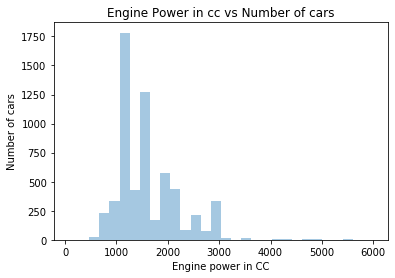

In [23]:
# Plotting histogram of engine power in cc

plot1 = sns.distplot(train_data3['Engine'],kde = False,hist=True,bins=30)
plot1.set(xlabel = 'Engine power in CC',ylabel = 'Number of cars')
plot1.set_title("Engine Power in cc vs Number of cars")
plt.ioff()

From the above plot we infer that the most of the cars being analysed fall in the region between 1000 to 2000 cc.
It was to be expected as a normal car for family use mostly falls in this range of engine power.

#### POWER HISTOGRAM

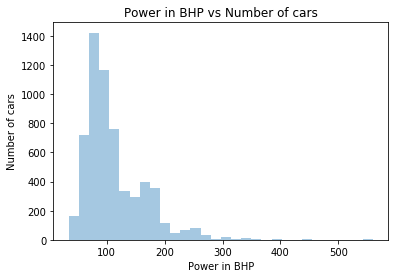

In [24]:
# Plotting histogram of power in BHP

plot2 = sns.distplot(train_data3['Power'],kde = False,hist=True,bins=30)
plot2.set(xlabel = 'Power in BHP',ylabel = 'Number of cars')
plot2.set_title("Power in BHP vs Number of cars")
plt.ioff()

From the above plot we infer that most of the cars have the power between 50 BHP to 150 BHP. Again this inference helps us ascertain that the dataset is not biased and has randomly distributed data points in it. 

#### FUEL TYPE VS MILEAGE

A Fuel Type vs Mileage plot would not yield much information unless and until we deal with cars which have there Engine and Power within a certain range that is most relevant. As we see from the above plots that cars with engine between 1000 to 2000 cc and power between 50 to 150 BHP are most preferred we will deal with these types of cars only in this plot.

In [25]:
data2 = data.copy()
train_data2 = train_data.copy()
train_data3 = data.iloc[0:6019,:]

In [26]:
train_data4 = data2.iloc[0:6019,:]
train_data4 = train_data4[((1000<train_data4.Engine) & (train_data4.Engine<2000)) & ((50<train_data4.Power) & \
                                                                                     (train_data4.Power<150)) ]
train_data4.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,560,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,529,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,1160,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,23,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
6,1499,6,2013,86999,1,1,0,23.08,1461.0,63.10,5.0,3.50
8,2011,10,2013,64430,1,1,0,20.54,1598.0,103.60,5.0,5.20
9,1720,2,2012,65932,1,1,2,22.30,1248.0,74.00,5.0,1.95
10,1139,7,2018,25692,4,1,0,21.56,1462.0,103.25,5.0,9.95
11,460,8,2012,60000,4,0,0,16.80,1497.0,116.30,5.0,4.49
12,1266,6,2015,64424,1,1,0,25.20,1248.0,74.00,5.0,5.60


<function matplotlib.pyplot.ioff()>

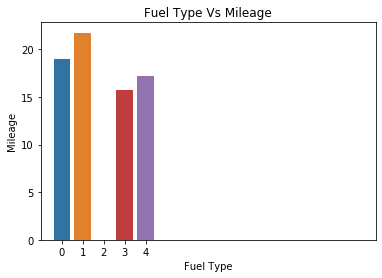

In [27]:
# Plotting a barplot for fuel type vs mileage for train_data4 dataset

y_axis = train_data4.groupby('Fuel_Type').Mileage.mean().values
x_axis = train_data4.groupby('Fuel_Type').Mileage.mean().index

plot3 = sns.barplot(x=x_axis, y=y_axis)
plot3.set(xlabel = 'Fuel Type', ylabel = 'Mileage')
plot3.set_title('Fuel Type Vs Mileage')
plot3.set(xlim = (-1,15))
plt.ioff

From the above plot we see that the diesel and CNG engines are the best performers in terms of mileage in the segments of cars most liked by the people . Although the mileage of Electric vehicle is shown zero, it is not .The problem is electric cars are still not very popular in the most sought after segment of cars and hence it is absent here . LPG and Petrol perform quite well bt are not at par with the mileage given by Diesel and CNG engines.

#### PRICE VS KILOMETERS DRIVEN



In [28]:
# Creating another data set for the following plot
train_data5 = data2.iloc[0:6019,:]

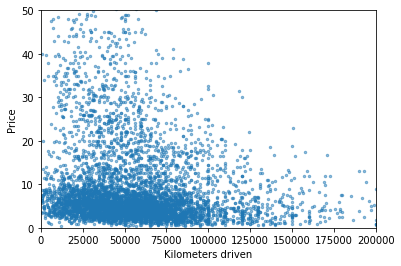

In [29]:
# Plotting a scatter plot between kilometers driven and price
plt.scatter(x=train_data5.Kilometers_Driven,y=train_data5.Price, alpha =0.5, s =6)
plt.ylim(0,50)
plt.xlim(0,200000)

plt.xlabel('Kilometers driven')
plt.ylabel('Price')
plt.show()

From the above graph we see that most of the cars are clustered in an area where the kilometers driven is between 0 to 1 lakh and the price is less than 10 lakhs.
The price can go as high upto 30 lakhs with drive kilometers between 25000 to 75000.

####  LOCATION VS PRICE

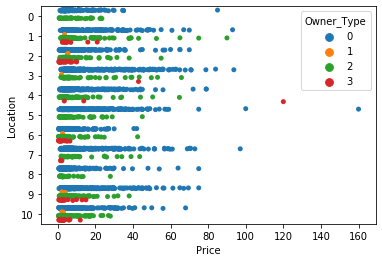

In [30]:
# Plotting a stripplot between location and price with the hue of Owner Type

plot5 =  sns.stripplot(y = train_data5.Location , x = train_data5.Price, hue = train_data5.Owner_Type, dodge = True, orient = 'h')

plt.ioff()

1. Almost all cities can seen to have good sale of second hand cars with prices going up to 25 lakhs.
2. All the cities have similar sale of first hand cars.
3. Pune, Chennai, Jaipur have significant sale of third hand cars over the other cities
4. Fourth hand cars are rarely sold with only comparatively significant amounts of sale in Mumbai, Pune, Chennai, 
   Jaipur , Bangalore.

#### LOCATION VS VEHICLE COUNT 

[Text(0, 0.5, ''), Text(0.5, 0, 'Number of Cars')]

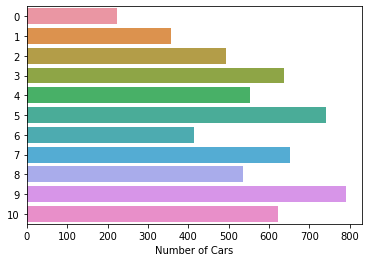

In [31]:
# Plotting a barplot to show the number of car sales in different cities
plot6 = sns.barplot(y=train_data5.Location.value_counts().index, x= train_data5.Location.value_counts().values, orient = 'h')
plot6.set(xlabel = 'Number of Cars', ylabel = '')

This graph is just to give a rough idea about the total number of cars sold in diffrent locations.
As is very clear the cities of Mumbai, Hyderabad have very high sale followed by Kochi, Coimbatore , Pune.

#### YEAR(EDITION) VS PRICE  

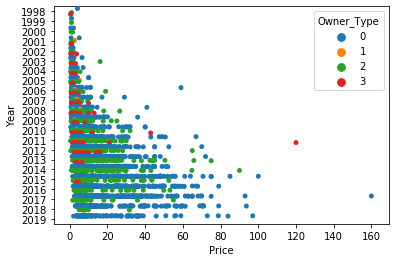

In [32]:
# Plotting a stripplot between Year and Price with the hue of Owner Type

plot7 =  sns.stripplot(x = train_data5.Price , y = train_data5.Year, hue = train_data5.Owner_Type, dodge = True, orient = 'h')
plt.ioff()

1. In the editions launched between 2011 to 2015 the second hand car prices seem to be substatially high .
2. The price of first hand cars increased upto the year 2017 and then is decreasing slightly.
3. Most of the fourth hand cars are editions from 2012 or before and their prices are not crossing 15 lakhs.

# MODEL CONSTRUCTION AND PERFORMANCE ASSESMENT

In [33]:
x=data.iloc[:6019,:-1]
y=data.iloc[:6019,-1]
x_tst=data.iloc[6019:,:-1]

###  Prediction of  values using DecionTreeRegressor and RandomForestRegressor is far better than Linear Regression in this case.


### But 'RandomForestRegressor' produces  good efficiency than 'DecisonTreeRegressor',because the Random forest by default has "n_estimators=100", number of Decision tree produed under this is 100,so result predicted by this is too good than Desion tree.That's why I chose RandomForestRegressor as my prediction model.

##  After analysing predictions' with train data ,I choose RandomForestRegressor.

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)
prediction=regressor.predict(x_test)
print("R2_score Accuarcy:{}%".format(r2_score(y_test,prediction)*100))

R2_score Accuarcy:91.64235144125163%


# PREDICTION ON TEST DATASET BY VERZEO

In [35]:
pr=regressor.predict(x_tst)
test_data["Price_Prediction"]=pr

In [36]:
test_data.head(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_Prediction
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,3.257000
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,2.736800
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,18.036900
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,3.357200
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,4.652333
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,12.112300
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,19.366700
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,2.163500
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,3.847100
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,10.493000


# **********#*******  The End  **********#******